# Video Game Sales Predictor

**Prediction of Eurpoean Sales, North American Sales, Japan Sales and Global sales**

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calling the Dataset

In [2]:
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# removing data columns where Name, Platform, Year_of_Release, Genre and Publisher are null

games = games.dropna(axis=0, subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher'])

In [7]:
games.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [8]:
games.shape

(16415, 16)

In [9]:
type(games)

pandas.core.frame.DataFrame

In [10]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# Keeping columns required for Sales Prediction 

In [11]:
data = games[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]

<AxesSubplot:>

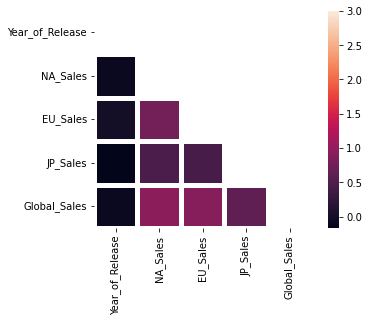

In [12]:
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
sns.heatmap(data.corr(),mask=mask,vmax=3,square=True,linewidths=5)

# Data Preprocessing

In [13]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...
16713,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.01
16714,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.01
16715,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.01
16716,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.01


In [14]:
data['Year_of_Release'] = data['Year_of_Release'].astype(int)

C:\conda_tmp\ipykernel_18164\4251614883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_of_Release'] = data['Year_of_Release'].astype(int)


In [15]:
data.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Global_Sales       float64
dtype: object

In [16]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Global_Sales       0
dtype: int64

In [17]:
data.to_csv('CleanData.csv')

In [18]:
X = data.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'])
y = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]

In [19]:
X

,Name,Platform,Year_of_Release,Genre,Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo
...,...,...,...,...,...
16713,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei
16714,LMA Manager 2007,X360,2006,Sports,Codemasters
16715,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory
16716,Spirits & Spells,GBA,2003,Platform,Wanadoo


In [20]:
y

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,41.36,28.96,3.77,82.53
1,29.08,3.58,6.81,40.24
2,15.68,12.76,3.79,35.52
3,15.61,10.93,3.28,32.77
4,11.27,8.89,10.22,31.37
...,...,...,...,...
16713,0.00,0.00,0.01,0.01
16714,0.00,0.01,0.00,0.01
16715,0.00,0.00,0.01,0.01
16716,0.01,0.00,0.00,0.01


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Splitting into training and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

# Applying OHE(One Hot Encoding) on String data

In [23]:
ohe = OneHotEncoder()
ohe.fit(X[['Name', 'Platform', 'Genre', 'Publisher']])

OneHotEncoder()

In [24]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ['Name', 'Platform', 'Genre', 'Publisher']),
                                       remainder = 'passthrough')

# Building the model

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
pipe = make_pipeline(column_trans,reg)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [26]:
abs(r2_score(y_test, y_pred))

0.061139311521569956

In [27]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = i)
    reg = LinearRegression()
    pipe = make_pipeline(column_trans, reg)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(abs(r2_score(y_test, y_pred)))

np.argmax(scores)

87

In [28]:
scores[np.argmax(scores)]

0.7946212677685752

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = np.argmax(scores))
reg = LinearRegression()
pipe = make_pipeline(column_trans,reg)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
abs(r2_score(y_test, y_pred))

0.7946212677685752

In [30]:
import pickle
pickle.dump(pipe, open('SalesPrediction.pkl', 'wb'))

# Prediction1 

**Image from the data**
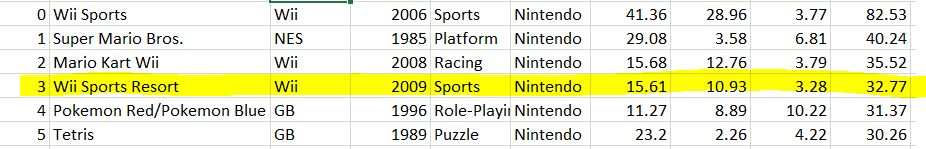

In [31]:
pipe.predict(pd.DataFrame([['Wii Sports Resort', 'Wii',2009,'Sports', 'Nintendo']], columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher']))

array([[15.61001063, 10.92999828,  3.28000229, 32.76999825]])

# Prediction2

**Image from the dataset**
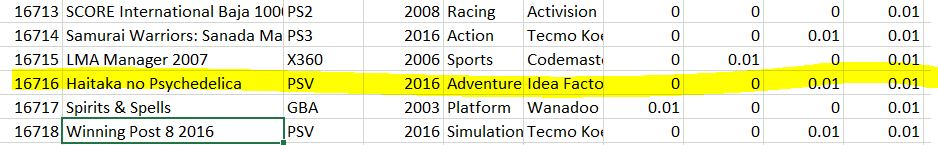

In [32]:
pipe.predict(pd.DataFrame([['Haitaka no Psychedelica', 'PSV', 2016,'Adventure','Idea Factory']], columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher']))

array([[ 4.69563315e-06, -5.58762594e-06,  1.00035027e-02,
         1.00001060e-02]])

# Prediction3

**Image from Dataset**
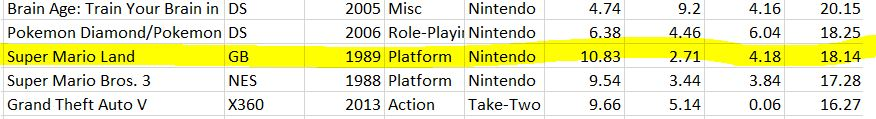

In [33]:
pipe.predict(pd.DataFrame([['Super Mario Land', 'GB', 1989,'Platform','Nintendo']], columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher']))

array([[10.83003109,  2.71001679,  4.18000116, 18.14003178]])

# Predicting the rating of the game

In [34]:
data2 = pd.read_csv('Video_Games_Sales.csv')

In [35]:
data2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data2.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

# Data Cleaning

In [37]:
CleanData = data2.dropna(subset = ['Rating','Critic_Score','User_Score'])

In [38]:
CleanData.drop(columns=['Publisher','Year_of_Release','Platform','Developer','User_Count','Critic_Count'],inplace=True)

C:\conda_tmp\ipykernel_18164\2846366852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData.drop(columns=['Publisher','Year_of_Release','Platform','Developer','User_Count','Critic_Count'],inplace=True)


In [39]:
CleanData

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8,E
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8,E
6,New Super Mario Bros.,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Misc,13.96,9.18,2.93,2.84,28.92,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...
16698,Planet Monsters,Action,0.01,0.00,0.00,0.00,0.01,67.0,tbd,E
16699,Breach,Shooter,0.01,0.00,0.00,0.00,0.01,61.0,5.8,T
16700,Bust-A-Move 3000,Puzzle,0.01,0.00,0.00,0.00,0.01,53.0,tbd,E
16701,Mega Brain Boost,Puzzle,0.01,0.00,0.00,0.00,0.01,48.0,tbd,E


In [40]:
CleanData.isnull().sum()

Name            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
User_Score      0
Rating          0
dtype: int64

# Data Preprocessing

In [41]:
CleanData.drop(CleanData.index[CleanData['User_Score'] == 'tbd'], inplace=True)

C:\conda_tmp\ipykernel_18164\311565180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData.drop(CleanData.index[CleanData['User_Score'] == 'tbd'], inplace=True)


In [42]:
CleanData.dtypes

Name             object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
User_Score       object
Rating           object
dtype: object

In [43]:
CleanData["User_Score"] = pd.to_numeric(CleanData["User_Score"], downcast="float")
print(CleanData.dtypes)

Name             object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
User_Score      float32
Rating           object
dtype: object


C:\conda_tmp\ipykernel_18164\2867591884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData["User_Score"] = pd.to_numeric(CleanData["User_Score"], downcast="float")


In [44]:
CleanData['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'K-A', 'RP'], dtype=object)

In [45]:
X = CleanData.drop(columns=['Rating'])
y = CleanData[['Rating']]

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [48]:
ohe = OneHotEncoder()
ohe.fit(X[['Name', 'Genre']])

OneHotEncoder()

In [49]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ['Name',  'Genre']),
                                       remainder = 'passthrough')

# Building the model

In [50]:
pipe2 = make_pipeline(column_trans,reg)
pipe2.fit(X_train,y_train)
y_pred2 = pipe2.predict(X_test)

In [51]:
abs(r2_score(y_test, y_pred2))

0.52484810601428

In [52]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = i)
    reg = LinearRegression()
    pipe2 = make_pipeline(column_trans, reg)
    pipe2.fit(X_train, y_train)
    y_pred2 = pipe2.predict(X_test)
    scores.append(abs(r2_score(y_test, y_pred2)))

np.argmax(scores)

86

In [53]:
scores[np.argmax(scores)]

0.605965046570657

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = np.argmax(scores))
reg = LinearRegression()
pipe2 = make_pipeline(column_trans,reg)
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
abs(r2_score(y_test, y_pred2))

0.605965046570657

In [55]:
import pickle
pickle.dump(pipe2, open('Rating.pkl', 'wb'))

# Predictions

In [56]:
pipe2.predict(pd.DataFrame([['Wii Sports', 'Sports',41.36,28.96,3.77,8.45,82.53,76,8]], columns = ['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score']))

array([-1.89815134e-05])

In [57]:
pipe2.predict(pd.DataFrame([['Mario Kart Wii', 'Racing',15.68,12.76,3.79,3.29,35.52,82,8.3]], columns = ['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score']))

array([-1.12822777e-05])

In [58]:
pipe2.predict(pd.DataFrame([['Grand Theft Auto V', 'Action',7.02,9.09,0.98,3.96,21.04,97,8.2]], columns = ['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score']))

array([3.04827978])

In [59]:
pipe2.predict(pd.DataFrame([['Final Fantasy VII', 'Role-Playing',3.01,2.47,3.28,0.96,9.72,92,9.2]], columns = ['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score']))

array([5.00000821])

In [60]:
pipe2.predict(pd.DataFrame([['Kinect Sports', 'Sports',3.92,1.73,0.03,0.51,6.19,73,7.4]], columns = ['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score']))

array([0.9999991])